# SSH Open Marketplace data quality overview

This notebook offers an overview of the SSH Open Marketplace dataset and was built to help moderators to: 1/ gain a better understanding of the SSH Open Marketplace data population; 2/ prioritising their curation tasks.  


## 0. Requirements to run the notebook

This section should give all the relevant information to "interact" with the MP data (whatever the method we choose at the end).



## 0.1
*There are a number of external libraries needed to run the notebook, a cell with python import commands is required to import them. Below the import for libraries needed for this notebook*

In [1]:
import pandas as pd #to manage dataframes
import matplotlib.pyplot as plt #to create histograms and images
import seaborn as sns #to create histograms and images
import json #to manage json objects
from sshmarketplacelib import MPData as mpd
from sshmarketplacelib import  eval as eva, helper as hel
#both following imports are needed to use utils functions in this notebook
# import import_ipynb
# import utils

## 0.2

*The data that we want in this notebook check must be downloaded, the following cell downloads data using the util functions.*

In [2]:

mpdata = mpd()
df_tool_flat =mpdata.getMPItems ("toolsandservices", True)
df_publication_flat =mpdata.getMPItems ("publications", True)
df_trainingmaterials_flat =mpdata.getMPItems ("trainingmaterials", True)
df_workflows_flat =mpdata.getMPItems ("workflows", True)
df_datasets_flat =mpdata.getMPItems ("datasets", True)

getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...
getting data from local repository...


In [3]:
help(mpdata.getMPItems)

Help on method getMPItems in module sshmarketplacelib.mpdata:

getMPItems(itemscategory, localrepository=False, pages=0) method of sshmarketplacelib.mpdata.MPData instance
    Loads data from MP dataset. This method creates a dataframe, stores it in a local repository and returns it to the caller.
    
    Parameters:
    -----------
    
    itemscategory : str
        The category of items
    localrepository : boolean, optional
        Indicates if the user wants the local dataset if present, if not present the remote dataset is used 
    pages : int, optional
        The number of pages, default is all
    
    Returns:
    --------
    
    DataFrame: Returning value
    
    If the localrepository parameter is 'False' or is defined, the items are downloaded from the MP dataset, 
    if the localrepository parameter is 'True' the items are first searched in the local repository 
    and if they are not present they are downloaded from the remote MP dataset. 
    When the items are

## 0.2.1
*The function getMPItems(category, local) used in the previous cell, returns all the items of the specific category as a table where the colums are the attributes. It is useful to display the structure of the table. In the next cell the structure of the __df_publication_flat__ table is shown(all tables obtained with the getMPItems functions have the same structure)*

In [4]:
df_tool_flat.head()



,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,externalIds,...,source.url,source.urlTemplate,version,thumbnail.info.mediaId,thumbnail.info.category,thumbnail.info.filename,thumbnail.info.mimeType,thumbnail.info.hasThumbnail,thumbnail.info.location.sourceUrl,thumbnail.caption
0,28230,tool-or-service,140kit,SIU1nO,2021-11-23T17:24:25+0000,approved,140kit provides a management layer for tweet c...,"[{'actor': {'id': 2224, 'name': 'Ian Pearce, D...","[{'type': {'code': 'mode-of-use', 'label': 'Mo...",[],...,http://tapor.ca,http://tapor.ca/tools/{source-item-id},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36324,tool-or-service,3DF Zephyr - photogrammetry software - 3d mode...,4gDAHv,2022-01-13T11:49:02+0000,approved,3DF Zephyr\[1\]\[2\] is a commercial photogram...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36552,tool-or-service,3DHOP,UcxOmD,2022-01-13T11:50:31+0000,approved,3DHOP (3D Heritage Online Presenter) is an ope...,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36555,tool-or-service,3DHOP: 3D Heritage Online Presenter,uFIMPQ,2022-01-13T11:50:32+0000,approved,No description provided.,[],[],[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36189,tool-or-service,3DReshaper \| 3DReshaper,kAkzuz,2022-01-13T11:47:44+0000,approved,No description provided.,[],"[{'type': {'code': 'language', 'label': 'Langu...",[],...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. SSH Open Marketplace items provenance

In [5]:
utils=hel.Util()
#get the dataframe
df_items_by_sources=utils.getAllItemsBySources()
#prints the content of the dataframe
#print('{:<30}N. Items'.format("Source Label"), end='\n')
# the function head(n) shows the first n rows of a dataframe
df_items_by_sources.head(10)

dblp: DH Publications            2810
TAPoR                            1337
SSK Zotero Resources              355
Humanities Data                   302
The Programming Historian         169
NA                                114
DARIAH-CAMPUS                      80
Language Resource Switchboard      51
EOSC Catalogue                     30
Standardization Survival Kit       25
Name: source.label, dtype: int64

The following cell uses the function *plot* of the dataframe to draw a bar chart. 

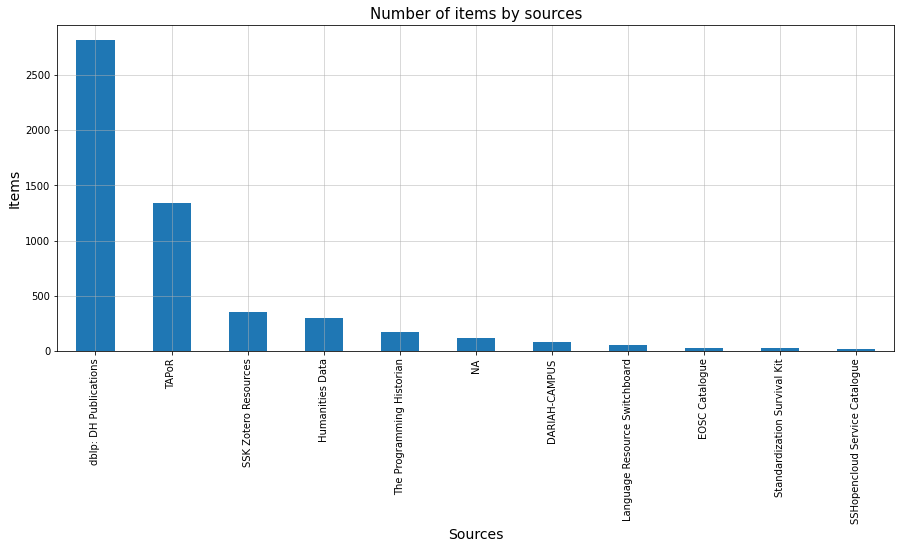

In [6]:
fig, ax = plt.subplots()
df_items_by_sources.plot(kind='bar', figsize=(15,6))
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of items by sources", fontsize=15)
ax.set_xlabel('Sources', fontsize=14)
ax.set_ylabel('Items', fontsize=14);
plt.show()

### Item Categories by source providers

In [7]:
df_categories_bysources=utils.getCategoriesBySources()
df_categories_bysources.head()

source.label,DARIAH-CAMPUS,EOSC Catalogue,Humanities Data,Language Resource Switchboard,SSHopencloud Service Catalogue,SSK Zotero Resources,Standardization Survival Kit,TAPoR,The Programming Historian,dblp: DH Publications
Categories,,,,,,,,,,
dataset,0.0,0.0,302.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
publication,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,0.0,2810.0
tool-or-service,0.0,30.0,0.0,51.0,18.0,156.0,0.0,1337.0,0.0,0.0
training-material,80.0,0.0,0.0,0.0,2.0,63.0,0.0,0.0,169.0,0.0
workflow,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0


### 1.2 Iitems created by individual users 

The dataset of items not created by 'system importer' can be obtained by filtering the value of the correspondent attribute.  
The attribute in the dataset where the name of the creator is stored is *informationContributor.username* , in the cell below the *publication* dataset is filtered to individuate items not created by System importer, the resulting dataset is empty. 

In [8]:
publications_imported_by_Si=df_publication_flat[(df_publication_flat['informationContributor.username']!='System importer') & (df_publication_flat['source.label'].isna())]
publications_imported_by_Si[['label', 'category','informationContributor.displayName', 'source.label']].head()

,label,category,informationContributor.displayName,source.label
2110,ROSSIO Infrastructure: a digital research tool...,publication,Laure Barbot,NaN
2269,Surveys to Ethnic and Migrant Minorities acros...,publication,Martin Kirnbauer,NaN
2380,The Development of the ROSSIO Thesaurus: Suppo...,publication,Laure Barbot,NaN


In [9]:
df_all_items=pd.concat([df_tool_flat, df_publication_flat, df_trainingmaterials_flat, df_workflows_flat, df_datasets_flat])
item_imported_by_user=df_all_items[df_all_items['informationContributor.username']!='System importer']
item_imported_by_user[['label', 'category','informationContributor.displayName']].sort_values('category').tail(8)

,label,category,informationContributor.displayName
4,Create a dictionary in TEI,workflow,System Moderator
6,Creation of a TEI-based corpus,workflow,System Moderator
11,Extract textual content from images,workflow,System Moderator
12,How to create a workflow in the SSH Open Marke...,workflow,Laure Barbot
15,Linguistic annotation of corpora,workflow,System Moderator
17,Multispectral imaging for the in-situ ...,workflow,System Moderator
24,Tracking the dissemination of a specific work,workflow,System Moderator
25,UAV data acquisition and management for ...,workflow,System Moderator


## 2. Non-redundancy

the same entity should only be referenced once in the SSH Open Marketplace. Duplicate items are merged to ensure the coherence of the items showcased in the portal. 

### 2.1 Identification of the duplicates

*Duplicates are individuated for every category by defining the attributes that should be inspected to identify equal items. In the next cell the function __getDuplicates(category, attributes)__ is invoked to get for every category the subset of items having the same value in the 'attribute' label, each set of duplicated items is stored in a variable*

In [10]:
df_tool_duplicates=utils.getDuplicates(df_tool_flat, 'label')
df_publication_duplicates=utils.getDuplicates(df_publication_flat, 'label')
df_trainingmaterials_duplicates=utils.getDuplicates(df_trainingmaterials_flat, 'label')
df_workflows_duplicates=utils.getDuplicates(df_workflows_flat, 'label')
df_datasets_duplicates=utils.getDuplicates(df_datasets_flat, 'label')

## 2.1.1
*The  sets of duplicated items can be inspected, in the next cell the number of duplicated items for every category is shown*

In [11]:
print (f'There are: {df_tool_duplicates.shape[0]} duplicated tools, {df_publication_duplicates.shape[0]} duplicated publications,'
       +f' {df_trainingmaterials_duplicates.shape[0]} duplicated training materials,'+
      f' {df_workflows_duplicates.shape[0]} duplicated workflows,'+
      f' {df_datasets_duplicates.shape[0]} duplicated datasets')
    

There are: 14 duplicated tools, 4 duplicated publications, 2 duplicated training materials, 0 duplicated workflows, 0 duplicated datasets


## 2.1.2

*It's possible to see the values of some of the duplicated items. In the next cell there is a command to show 3 items of the dataset for duplicated tools.*

In [12]:
df_trainingmaterials_duplicates.head(3)

,MPUrl,id,category,label,persistentId,lastInfoUpdate,status,description,contributors,properties,...,source.url,source.urlTemplate,dateCreated,dateLastUpdated,thumbnail.info.mediaId,thumbnail.info.category,thumbnail.info.location.sourceUrl,thumbnail.info.mimeType,thumbnail.info.hasThumbnail,thumbnail.info.filename
45,training-material/KbYQxy,36300,training-material,ContextCapture tutorials,KbYQxy,2022-01-13T11:48:53+0000,approved,"To get started with ContextCapture, we recomme...",[],"[{'type': {'code': 'language', 'label': 'Langu...",...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,training-material/vySU0m,36303,training-material,ContextCapture tutorials,vySU0m,2022-01-13T11:48:54+0000,approved,"To get started with ContextCapture, we recomme...",[],"[{'type': {'code': 'language', 'label': 'Langu...",...,https://www.zotero.org/groups/427927/ssk-parth...,https://api.zotero.org/groups/427927/items/{so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.1.3

*As shown in the section __0.2.1__ of this notebook every row in the table includes 30 different attributes, it may be useful to define a list of attributes and use it when showing the data. In the next cell a list of attributes is defined and used as visualization mask for 6 items in the duplicated tool dataset*

In [13]:
# the list of attributes
vis_attr=['MPUrl', 'persistentId', 'label','description', 'source.label','accessibleAt']
df_tool_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt
20,tool-or-service/3NqTBe,3NqTBe,Adobe Acrobat Reader,http://www.wikidata.org/entity/Q2634567,NaN,[]
21,tool-or-service/sc1bNI,sc1bNI,Adobe Acrobat Reader,http://www.wikidata.org/entity/Q60521777,NaN,[]
904,tool-or-service/mLLrAv,mLLrAv,NodeXL,"NodeXL is a free, open source tool for generat...",NaN,[https://nodexl.com/]
905,tool-or-service/4uAhJc,4uAhJc,NodeXL,http://www.wikidata.org/entity/Q16958587,NaN,[]
1090,tool-or-service/89LRtg,89LRtg,Quill,http://www.wikidata.org/entity/Q105972409,NaN,[]
1091,tool-or-service/6FBpZK,6FBpZK,Quill,http://www.wikidata.org/entity/Q30325191,NaN,[]


*The list of attributes can be applied to all sets of duplicated items, in the next two cells it is used to filter attributes in the set of duplicated workflows and training materials*

In [14]:
df_workflows_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt


In [15]:
df_trainingmaterials_duplicates[vis_attr].head(6)

,MPUrl,persistentId,label,description,source.label,accessibleAt
45,training-material/KbYQxy,KbYQxy,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]
46,training-material/vySU0m,vySU0m,ContextCapture tutorials,"To get started with ContextCapture, we recomme...",SSK Zotero Resources,[https://www.acute3d.com/tutorials/]


## 3. Completeness & metadata quality

We want to know how complete the SSH Open Marketplace dataset is, i.e. what is the level of quality of metadata describing the items populating the Marketplace.
As the data model of the Marketplace differentiates between attributes and properties, we want to mix these two different fields in the overview provided in this section.

### 3.1 Null values

## 3.1.1 Null values in attributes by item types
*There are a number of functions for null values. The function __getNullValues()__ returns a table where the columns are the category and the rows are the attributes. The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute. The function calculates the table for all the categories downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell gets the null values and shows them* 

In [16]:
df_null_values=utils.getNullValues()
df_null_values[0].head(35)

/Users/cesare/git/sshoccurationprod/marketplace-curation/sshmarketplacelib/helper.py:481: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,1,20,490,14,1
composedOf,308,2949,1695,318,0
concept.candidate,46,52,70,1,0
concept.code,46,52,70,1,0
concept.definition,307,2947,1557,318,18
concept.label,46,52,70,1,0
concept.notation,306,2947,651,237,9
concept.uri,46,52,70,1,0
concept.vocabulary.closed,46,52,70,1,0


## 3.1.2
*The function __getNullValues(attributes)__ returns a table where the columns are the categories and the rows are the attributes listed in the invocation.  The list of attributes should contain 1 or more attribute name separated by ','.
The number in the cell individuated by an attribute and a category indicates how many null values there are in that category for the attribute.  
The function calculates the table for all the dataset downloaded in the notebook. In this sepcific case all datasets downloaded in section __0.2__. The next cell searches for null values of properties: accessibleAt, description, contributors and relatedItems.* 

In [17]:
df_nullpart_values=utils.getNullValues('accessibleAt, contributors, relatedItems, description, discipline, keyword')
df_nullpart_values[0].head(6)

/Users/cesare/git/sshoccurationprod/marketplace-curation/sshmarketplacelib/helper.py:481: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(df_items, df_prop_data_tmp, left_on='persistentId',right_on='ts_persistentId', how = 'outer').fillna(np.nan)
/Users/cesare/git/sshoccurationprod/marketplace-curation/sshmarketplacelib/helper.py:494: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(left=df_items, right=tmp, left_on='persistentId', right_on='ts_persistentId', how = 'outer').fillna(np.nan)


category,dataset,publication,tool-or-service,training-material,workflow
property: missed values,,,,,
accessibleAt,1,20,490,14,1
contributors,3,67,226,57,0
relatedItems,307,2785,1509,257,26
description,0,2862,55,26,1
discipline,306,2948,1623,237,17
keyword,65,2944,279,64,7


## 3.1.3

*The function __getItemsWithNullValues(props, all)__ returns all items where the properties indicated in the list have null values.  
In the next cell:*

<ol>
    <li> <i>the function is invoked to get all items where the accessibleAt, contributors and relatedItems have null values, the parameter True means that all the attributes/properties in the list must be null in an item</i></li>
    <li> <i>the visualization mask is defined</i></li>
    <li> <i>some items are shown</i></li>
    </ol>
  

In [18]:
#1
df_items_null_values=utils.getItemsWithNullValues('accessibleAt, contributors, relatedItems', True)
#2
vis_items_mask=['MPUrl', 'persistentId', 'category', 'label', 'source.label','accessibleAt','contributors', 'relatedItems']
#3
df_items_null_values[vis_items_mask].tail()

,MPUrl,persistentId,category,label,source.label,accessibleAt,contributors,relatedItems
1259,tool-or-service/tsbNWP,tsbNWP,tool-or-service,SSH GDPR Code of Conduct,SSHopencloud Service Catalogue,NaN,NaN,NaN
1341,tool-or-service/Zztxus,Zztxus,tool-or-service,test vocabularies,NaN,NaN,NaN,NaN
4853,training-material/BvZp6o,BvZp6o,training-material,OCR with Tesseract and ScanTailor,The Programming Historian,NaN,NaN,NaN
4920,training-material/m6qr2d,m6qr2d,training-material,Training Professionals Network,SSHopencloud Service Catalogue,NaN,NaN,NaN
5008,dataset/u11tRS,u11tRS,dataset,Audio Transcript Data,SSHopencloud Service Catalogue,NaN,NaN,NaN


### 3.1.3.1

*The variable df_items_null_values contains the list of items where the values for accessibleAt, contributors and relatedItems are all null, we can inspect the dataset.  
How many items are in the dataset?  
The cell below prints the number of items in the dataset*

In [19]:

print (f'\n There are {df_items_null_values.shape[0]} items where the values in attributes accessibleAt, contributors, relatedItems are null \n')



 There are 15 items where the values in attributes accessibleAt, contributors, relatedItems are null 



*What are the sources?*

In [20]:
test=df_items_null_values.groupby('source.label').count()['label']
test

source.label
SSHopencloud Service Catalogue    12
TAPoR                              1
The Programming Historian          1
Name: label, dtype: int64

In [21]:
rend_nv_table_df=df_items_null_values[['MPUrl', 'category', 'source.label','label']]
clickable_nv_table = rend_nv_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_nv_table

,MPUrl,category,source.label,label
74,tool-or-service/CqCK1n,tool-or-service,SSHopencloud Service Catalogue,API for Generations and Gender Programme (GGP)
93,tool-or-service/wLzD4H,tool-or-service,SSHopencloud Service Catalogue,Audio Survey Module Questionnaire and Fieldwork Implementation Guideline
229,tool-or-service/m5jJ5s,tool-or-service,SSHopencloud Service Catalogue,Code for data exchange between TMT and open source CAT software
320,tool-or-service/8lXz8g,tool-or-service,SSHopencloud Service Catalogue,Data Confidentiality Schema for Sensitive Data
414,tool-or-service/9McIgG,tool-or-service,SSHopencloud Service Catalogue,ERAN Pilot: Specifications for Secure Remote Access to Sensitive Research Data
487,tool-or-service/a47VVu,tool-or-service,SSHopencloud Service Catalogue,Framework for data use agreement
640,tool-or-service/CzWHtv,tool-or-service,SSHopencloud Service Catalogue,Interoperability Hub
661,tool-or-service/NvN0y8,tool-or-service,TAPoR,iTunesCyrFix
775,tool-or-service/2KpJe6,tool-or-service,SSHopencloud Service Catalogue,Making Data Findable by being Citable - Tools
1258,tool-or-service/AOHiq8,tool-or-service,SSHopencloud Service Catalogue,SSH Data repository service on EOSC


### 3.1.3.2 - Coverage of *recommended* attributes/dynamic properties

The following shows how values for the recomennded properties are distributed in categories



In [22]:
recommended_ts='accessibleAt, contributors, externalIds, media, relatedItems, version, activity, keyword, discipline, language, tool-family, mode-of-use, intended-audience, see-also, user-manual-url, helpdesk-url, license, terms-of-use-url, technology-readiness-level'
recommended_ts_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems', 'version', 'activity', 'keyword', 'discipline', 'language', 'tool-family', 'mode-of-use', 'intended-audience', 'see-also', 'user-manual-url', 'helpdesk-url', 'license', 'terms-of-use-url', 'technology-readiness-level']

df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)

/Users/cesare/git/sshoccurationprod/marketplace-curation/sshmarketplacelib/helper.py:613: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(left=df_items, right=tmp, left_on='persistentId', right_on='ts_persistentId', how = 'outer').fillna(np.nan)


#### Coverage for Category and Source Providers

In [23]:
source_provider_label='TAPoR'
df_items_null_values_sp=df_items_null_values[(df_items_null_values['source.label']==source_provider_label) & (df_items_null_values['category']=='tool-or-service')]

df_coverage_sp=df_items_null_values_sp[recommended_ts_mask]
#df.loc[df['A'] > 2, 'B'] = new_val
df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)
#df_coverage_sp.loc[:,'value']=df_coverage_sp.isnull().sum(axis=1)
#df_coverage_sp_up=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']] 
labels_sp=df_coverage_sp[['MPUrl', 'persistentId', 'label', 'value']].groupby('value').count()['label']


#labels_sp.shape
#df_coverage_sp.head()

/var/folders/x6/4rl3xlp91ll551m6vbkh32xm0000gn/T/ipykernel_21962/1035405289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage_sp['value']=df_coverage_sp.isnull().sum(axis=1)


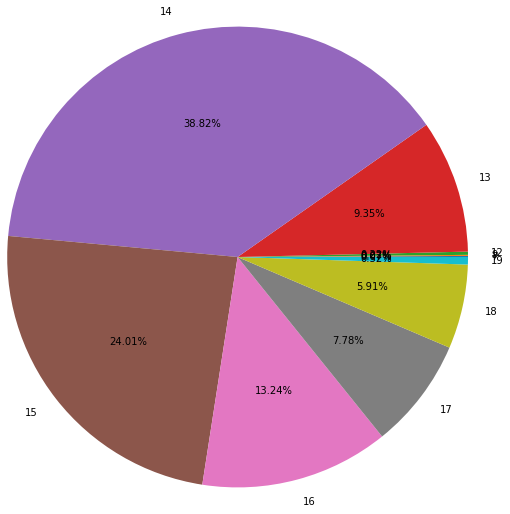

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_sp.values, labels = labels_sp.index,   autopct='%1.2f%%', radius = 2)
plt.show()

#### Coverage for all Tools or Services 

In [25]:
df_items_null_values=utils.getItemsWithNullValues(recommended_ts, False)
df_items_null_values=df_items_null_values[df_items_null_values.category=='tool-or-service']
df_coverage=df_items_null_values[recommended_ts_mask]
df_coverage['value']=df_coverage.isnull().sum(axis=1)
#df_coverage.isnull().sum(axis=1)
df_coverage_up=df_coverage[['MPUrl', 'persistentId', 'label', 'value']] 

/Users/cesare/git/sshoccurationprod/marketplace-curation/sshmarketplacelib/helper.py:613: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ts_persistentId_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_items=pd.merge(left=df_items, right=tmp, left_on='persistentId', right_on='ts_persistentId', how = 'outer').fillna(np.nan)
/var/folders/x6/4rl3xlp91ll551m6vbkh32xm0000gn/T/ipykernel_21962/3831632622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coverage['value']=df_coverage.isnull().sum(axis=1)


In [26]:
#xMeq9F
#df_items_null_values[recommended_ts_mask].head()

In [27]:
labels=df_coverage_up.groupby('value').count()['label']

test=labels[labels.values>11]

#labels.shape

#print(labels)


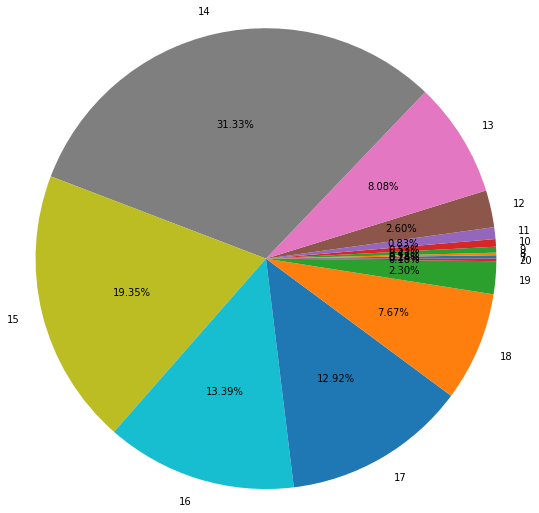

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels.values, labels = labels.index,   autopct='%1.2f%%', radius = 2)
plt.show()

#### List of tools or services with a specific number of null values in recommended properties

In [29]:
number_of_null_values=18

myw_url_status=df_coverage_up[df_coverage_up.value==number_of_null_values]
myclickable_table = myw_url_status.style.format({'MPUrl': utils.make_clickable})
myclickable_table

,MPUrl,persistentId,label,value
3,tool-or-service/uFIMPQ,uFIMPQ,3DHOP: 3D Heritage Online Presenter,18
6,tool-or-service/zrfCly,zrfCly,3DVIA Virtools,18
22,tool-or-service/U6hzqf,U6hzqf,Adobe After Effects,18
26,tool-or-service/aeQ2f6,aeQ2f6,Adobe InDesign,18
27,tool-or-service/E34Hob,E34Hob,Adobe Photoshop,18
35,tool-or-service/knCcCv,knCcCv,Aïoli platform,18
40,tool-or-service/AB57Ny,AB57Ny,aLTAG3D - a Long Term Archive Generator for 3D,18
55,tool-or-service/gKEK3M,gKEK3M,AnnotateIt,18
68,tool-or-service/r43yWg,r43yWg,Apache OpenNLP,18
70,tool-or-service/7PyEBu,7PyEBu,Apache Stanbol,18


#### Coverage for training materials

In [30]:
recommended_tm='accessibleAt, contributors, externalIds, media, relatedItems'
recommended_tm_mask=['persistentId', 'MPUrl', 'label','accessibleAt', 'contributors', 'externalIds', 'media', 'relatedItems']


In [31]:
df_items_null_values=utils.getItemsWithNullValues(recommended_tm, False)
df_tm_null_values=df_items_null_values[df_items_null_values.category=='training-material']
df_tm_coverage=df_tm_null_values[recommended_tm_mask]
df_tm_coverage['value']=df_tm_coverage.isnull().sum(axis=1)
#df_coverage.isnull().sum(axis=1)
df_tm_coverage_up=df_tm_coverage[['MPUrl', 'persistentId', 'label', 'value']] 
df_tm_coverage_up.head()

/var/folders/x6/4rl3xlp91ll551m6vbkh32xm0000gn/T/ipykernel_21962/328034726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tm_coverage['value']=df_tm_coverage.isnull().sum(axis=1)


,MPUrl,persistentId,label,value
4644,training-material/baDTwh,baDTwh,2.1 Error rates and ground truth - Text Digiti...,3
4645,training-material/T3JbA2,T3JbA2,3DHOP - How To,3
4646,training-material/L8gAnu,L8gAnu,3ds Max Tutorials: Introduction,3
4647,training-material/H6Y1zV,H6Y1zV,8 Transcriptions of Speech - The TEI Guidelines,3
4648,training-material/EHGRy5,EHGRy5,Administración de datos en R,2


In [32]:
labels_tm=df_tm_coverage_up.groupby('value').count()['label']
labels_tm.head()

value
1     87
2     91
3    122
4     15
5      1
Name: label, dtype: int64

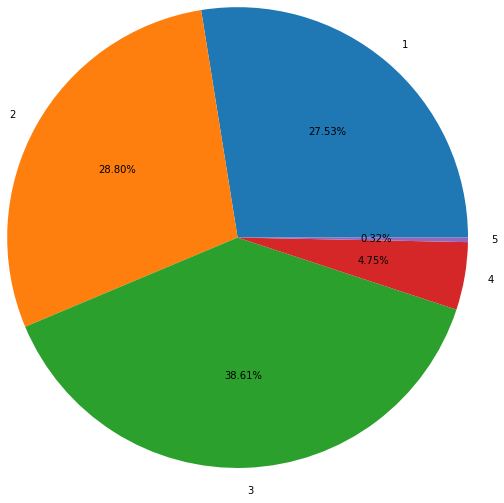

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

ax.pie(labels_tm.values, labels = labels_tm.index,   autopct='%1.2f%%', radius = 2)
plt.show()

## 3.2 Description lengh
For the `description` attribute, there should not be any null_values (this is a mandatory attribute and it is automatically filled with "No description provided" when it is empty at the ingest stage), so we want to list the items with a description length less than 25 and more than 1500 characters.


In [34]:
import numpy as np
df_all_items=pd.concat([df_tool_flat, df_publication_flat, df_trainingmaterials_flat, df_workflows_flat, df_datasets_flat])
df_items = df_all_items.replace(utils.empty_description, np.nan)

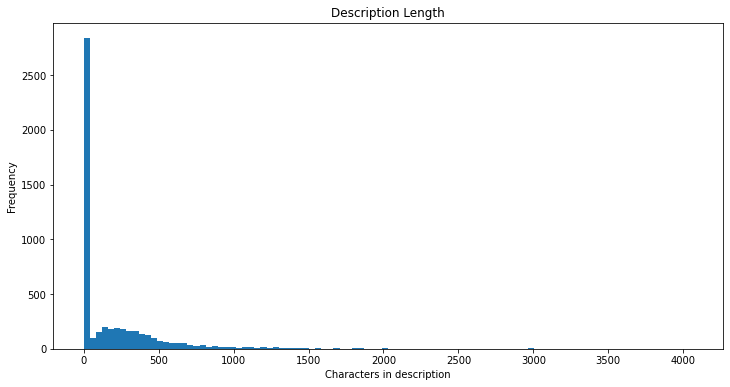

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_items['description'].str.len(),  bins=100)
ax.set_title('Description Length')
ax.set_xlabel('Characters in description')
ax.set_ylabel('Frequency');

In [36]:
minchars=25
maxchars=1500

df_items_d = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>=minchars) & (df_items['description'].str.len()<=maxchars)]

df_items_min = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()<minchars)]

df_items_max = df_items[(df_items['description'].notnull()) & (df_items['description'].str.len()>maxchars)]

print (f"\nThere are {df_items['description'].isna().sum()} items with empty descriptions, "+
       f" {df_items_min['description'].count()} items with description shorter than {minchars} characters,"+
f" {df_items_max['description'].count()} Items with description longer than {maxchars} characters, "+
      f" {df_items_d['description'].count()} Items with description between {minchars} and {maxchars} characters.")
       


There are 138 items with empty descriptions,  2809 items with description shorter than 25 characters, 41 Items with description longer than 1500 characters,  2308 Items with description between 25 and 1500 characters.


The distribution of empty descriptions in items by item sources

In [37]:
df_empty_desc=df_items[df_items['description'].isna()]
df_empty_desc.groupby('source.label').count()['label']

source.label
SSK Zotero Resources            131
Standardization Survival Kit      1
TAPoR                             4
The Programming Historian         2
Name: label, dtype: int64

*The next cell creates a table with a clickable url for items having description shorter than 25 characters*

In [38]:
rend_desc_table_df=df_items_min[['MPUrl', 'category', 'source.label','label', 'description']]
clickable_shortdesc_table = rend_desc_table_df.style.format({'MPUrl': utils.make_clickable})
clickable_shortdesc_table

,MPUrl,category,source.label,label,description
194,tool-or-service/o2X2Sl,tool-or-service,TAPoR,Chartle,Create simple charts.
917,tool-or-service/5jMQ6a,tool-or-service,SSK Zotero Resources,Offline Getting Started and Manual (pdf),Last Update: 14.12.2017
0,publication/FuBh5c,publication,dblp: DH Publications,"1947Partition On The Margins - The Untold Testimonies Of Sikh, Bahawalpur And Marwari Communities",No description provided
1,publication/EppSCv,publication,dblp: DH Publications,1 Million Dutch Newspaper Images available for researchers - The KBK-1M Dataset,No description provided
3,publication/A6IsdT,publication,dblp: DH Publications,3D Scanning for Preservation - Difficulties and Dissemination,No description provided
4,publication/oKWLnW,publication,dblp: DH Publications,"3rd International Workshop on Computational History, HistoInformatics@DH 2016, Krakow, Poland, July 11, 2016",No description provided
6,publication/aKo2px,publication,dblp: DH Publications,4Humanities - Designing Digital Advocacy,No description provided
7,publication/GBZujQ,publication,dblp: DH Publications,4 Ríos - una construcción transmedia de memoria histórica sobre el conflicto armado en Colombia,No description provided
8,publication/ZxsSTd,publication,dblp: DH Publications,5 Design Rules for Visualizing Text Variant Graphs,No description provided
10,publication/mqmg5f,publication,dblp: DH Publications,A 3D Common Ground - Bringing Humanities Data Together Inside Online Game Engines,No description provided


### 3.3 Media quality
--- still under discussion: how to check thumbnail and media quality?  

## 4. Contextualisation quality 

We want to know how well interlinked the items are in the Marketplace. 
One option could be to have a table presenting:
- as columns, three options: less than 4 relations; between 4 and 10 relations; more than 10 relations
- as raws, the item types OR the sources provenance

values given as results should ideally be clickable and lead to the list of items individuated by the count.





## 6. Activity coverage

We want to see an overview of the activity coverage in the Marketplace dataset, in a dedicated section of the notebook, because this is an important field. 

In [39]:
#the type.code value used as filter value
typecode='activity'
df_list_of_properties_sources=utils.getAllPropertiesBySources()
#filter properties by type.code
df_list_of_activity_properties=df_list_of_properties_sources[df_list_of_properties_sources["type.code"]==typecode]

In [40]:
df_list_of_activity_properties.head()

,MPUrl,type.code,type.label,type.type,type.groupName,type.hidden,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,...,concept.notation,concept.uri,concept.candidate,value,concept.definition,ts_label,persistentId,label,source.label,category
1,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",capturing,tadirah2,...,,https://vocabs.dariah.eu/tadirah/capturing,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
4,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",analyzing,tadirah2,...,,https://vocabs.dariah.eu/tadirah/analyzing,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
5,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",visualAnalysis,tadirah2,...,,https://vocabs.dariah.eu/tadirah/visualAnalysis,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
8,tool-or-service/SIU1nO,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",gathering,tadirah2,...,,https://vocabs.dariah.eu/tadirah/gathering,False,NaN,NaN,140kit,SIU1nO,140kit,TAPoR,tool-or-service
22,tool-or-service/rdwzoM,activity,Activity,concept,Categorisation,False,17,"[{'code': 'tadirah2', 'scheme': 'https://vocab...",programming,tadirah2,...,,https://vocabs.dariah.eu/tadirah/programming,False,NaN,NaN,4th Dimension,rdwzoM,4th Dimension,TAPoR,tool-or-service


In [41]:
df_list_of_activity_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4014 entries, 1 to 28783
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   MPUrl                         4014 non-null   object
 1   type.code                     4014 non-null   object
 2   type.label                    4014 non-null   object
 3   type.type                     4014 non-null   object
 4   type.groupName                4014 non-null   object
 5   type.hidden                   4014 non-null   bool  
 6   type.ord                      4014 non-null   int64 
 7   type.allowedVocabularies      4014 non-null   object
 8   concept.code                  4014 non-null   object
 9   concept.vocabulary.code       4014 non-null   object
 10  concept.vocabulary.scheme     4014 non-null   object
 11  concept.vocabulary.namespace  4014 non-null   object
 12  concept.vocabulary.label      4014 non-null   object
 13  concept.vocabular

In [42]:
tt_a_df=df_list_of_activity_properties.groupby(['concept.label', 'source.label']).count()['label'].unstack('source.label')

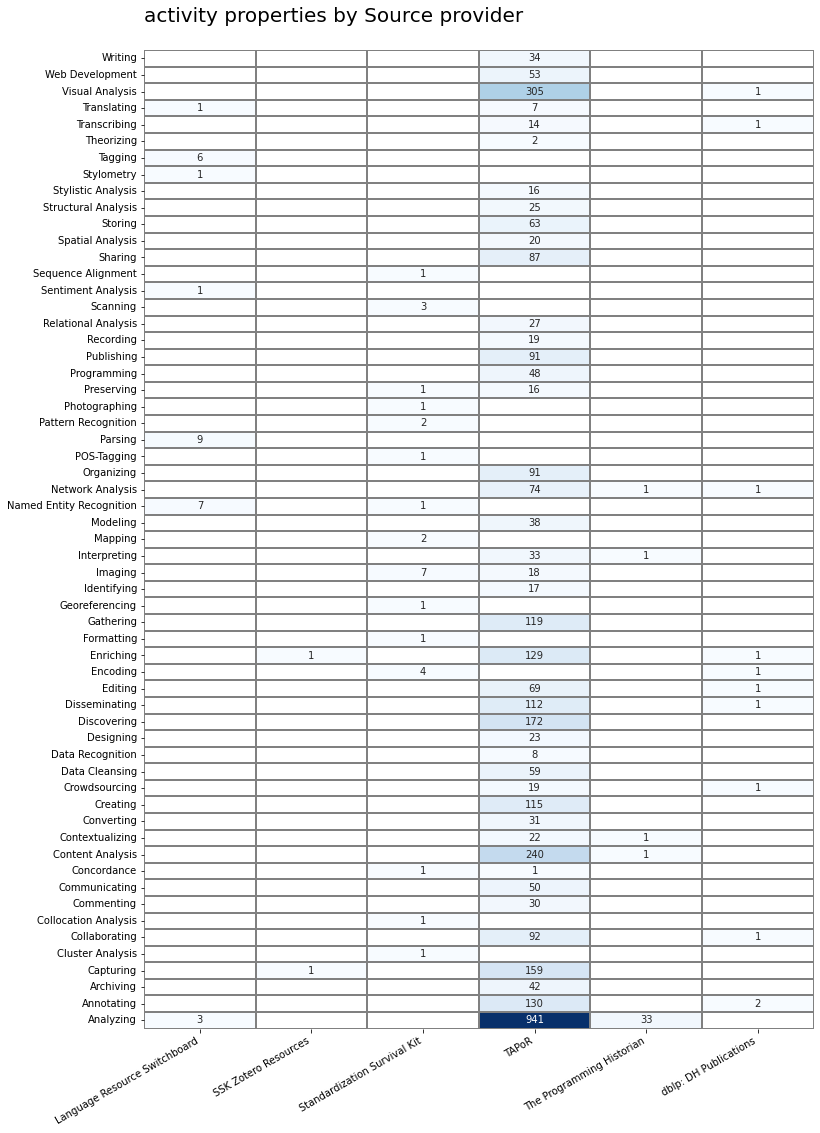

In [43]:
#change values in the next lines to resize the table
fig, ax = plt.subplots(figsize=(12, 18))
sns.heatmap(tt_a_df, annot=True, linewidths=0.1, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = typecode+' properties by Source provider\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

# SSHOC Market Place Data Library
A Python library for download and process the SSHOC marketPlace dataset. 
The libary has been designed to be used by the SSHOC Curation Module and provides a set of ad hoc functions that can be used in Python Notebooks or programs.
 
## Usage

To use the library functionalities: 

A - create an instance of mplib.MPData, and loads locally the MP data. The function:

#### getMPItems (category: str, local: boolean) -> DataFrame

downloads MP dataset and store it locally. The data is provided as a Data Frame i.e. data is organized in a tabular fashion and columns are labeled with the names of the attribites in MP datamodel.


 Example:
```Python 
 from mplib import MPData as mpd

 mpdata = mpd()
 ts_df=mpdata.getMPItems ("pubblications", True)
```

the data is returned as a Data Frame:

<table>
<tr>
	<th>id</th><th>	category</th><th>	label</th><th>	persistentId</th><th>	lastInfoUpdate</th><th>	status</th><th>	description</th><th>	contributors</th><th>	properties</th><th>	externalIds</th>
    </tr><tr>
<td>10414</td><td>	publication</td><td>	3D-ICONS -- 3D Digitisation of Icons of Europe...</td><td>	jOum8c</td><td>	2021-06-23T17:03:55+0000</td><td>	approved</td><td>	3D-ICONS was a pilot project funded under the ...	</td><td>[]</td><td>	[{'id': 41261, 'type': {'code': 'language', 'l...	</td><td>[]</td>
 </tr><tr>
<td>7454</td><td>	publication</td><td>	4 Default Text Structure - The TEI Guidelines</td><td>	Y3Vmhy</td><td>	2021-06-22T13:30:43+0000</td><td>	approved</td><td>	No description provided.</td><td>	[]</td><td>	[{'id': 41094, 'type': {'code': 'language', 'l...	</td><td>[]</td>
 </tr><tr>
<td>10738</td><td>	publication</td><td>	9 Dictionaries - The TEI Guidelines</td><td>	vQ7Bvs</td><td>	2021-06-23T17:04:34+0000</td><td>	approved</td><td>	No description provided.</td><td>	[]</td><td>	[{'id': 41163, 'type': {'code': 'language', 'l...	</td><td>[]</td><td>
 </tr>
</table>


B - use the helper functions to analyse the Market Place data, for example the function below returns the number of null values for all propertes in each item category:

#### getNullValues()-> DataFrame


Example:
```Python 
 from mplib import helper as hlpr

 utils = hlpr.Util()
 nv_df=utils.getNullValues()
```


Returns:
<TABLE>
    <tr>
    <th>category <br>property: missed values</th><th>dataset</th><th>publication</th><th>tool-or-service</th><th>	training-material</th><th>	workflow</th><th>
        </tr><tr>
<td>accessibleAt</td><td>	1</td><td>	7</td><td>	475</td><td>	14</td><td>	1</td>
    </tr><tr>
<td>composedOf</td><td>	305</td><td>	137</td><td>	1671</td><td>	321</td><td>	0</td>
    </tr><tr>
<td>concept.candidate</td><td>	46</td><td>	5</td><td>	157</td><td>	0</td><td>	0</td>
    </tr>
    <tr>
<td>...</td><td>...</td><td>...</td><td>...</td><td>...</td><td>...</td>
    </tr>

</TABLE> 
  


## Installation
It is recommended to install library in the virtual environment to avoid dependency clash. In order to install it enter cloned directory and install it via pip with explicit requirements.txt from the project.

- Clone the repository, enter the directory and install requirements:
```bash
git clone https://gitlab.gwdg.de/sshoc/marketplace-curation.git
cd marketplace-curation
pip install ./ -r ./requirements.txt
```

- Edit the config.yaml.template file and set the values, then rename the file as *config.yaml*

- Create a folder called 'data' in the same folder of your notebooks/programs
```
